In [1]:
# DSC540
# Weeks 11 & 12
# Milestone 5
# Author: Nathanael Ochoa
# 06/01/2024

# Merging the Data and Storing in a Database/Visualizing Data

I went back to the previous milestones and downloaded each of the finalized datasets as CSV files. They will be uploaded and used in this project milestone. 

Please take note that I am *not* claiming the data as my own but am using it for educational purposes. The links to the data sources can be found in the previous milestones *and* will also be hyperlinked in the summary located at the end of this document.

In [3]:
# Import packages
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Import data as a data frame, these are the datasets taken from the previous milestones
file = pd.read_csv("M5_flat_file.csv")  # Milestone 2
html = pd.read_csv("M5_html_table.csv")  # Milestone 3
api = pd.read_csv("M5_api_data.csv")  # Milestone 4

In [5]:
# Type check
print(f"file type: {type(file)}")
print(f"html type: {type(html)}")
print(f"api type:  {type(api)}")

file type: <class 'pandas.core.frame.DataFrame'>
html type: <class 'pandas.core.frame.DataFrame'>
api type:  <class 'pandas.core.frame.DataFrame'>


In [6]:
# Preview file data
file

,Unnamed: 0,date,date_month,date_day,date_year,min_temp,max_temp,rain,rainfall
0,0,01-01-1948,1,1,1948,42,51,True,0.47
1,1,01-02-1948,1,2,1948,36,45,True,0.59
2,2,01-03-1948,1,3,1948,35,45,True,0.42
3,3,01-04-1948,1,4,1948,34,45,True,0.31
4,4,01-05-1948,1,5,1948,32,45,True,0.17
...,...,...,...,...,...,...,...,...,...
25546,25546,12-10-2017,12,10,2017,34,49,False,0.00
25547,25547,12-11-2017,12,11,2017,29,49,False,0.00
25548,25548,12-12-2017,12,12,2017,32,46,False,0.00
25549,25549,12-13-2017,12,13,2017,34,48,False,0.00


In [7]:
# Preview html data
html

,Unnamed: 0,location,state,latitude,longitude,elevation,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,total
0,0,Aberdeen 20Nne,WA,47.261,-123.715,132.6,21.16,13.36,15.13,9.43,4.96,4.11,2.08,2.60,5.70,13.04,20.84,21.45,133.86
1,1,Alpine Meadows,WA,47.780,-121.700,1066.8,23.33,15.72,18.23,14.06,9.44,7.44,3.33,3.75,7.46,16.13,23.04,20.93,162.86
2,2,Anacortes,WA,48.511,-122.614,6.1,3.93,2.58,2.42,2.06,1.86,1.50,0.76,1.38,1.55,2.78,4.36,3.78,28.96
3,3,Anacortes 4.9 S,WA,48.420,-122.614,12.2,3.83,2.59,2.19,2.18,2.05,1.31,0.85,0.91,1.33,2.67,4.06,3.48,27.45
4,4,Arlington,WA,48.200,-122.128,30.5,5.92,4.42,5.00,4.34,3.43,2.66,1.15,1.34,2.49,4.94,7.15,6.15,48.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,331,Winthrop 3.5 Wnw,WA,48.494,-120.248,872.6,2.59,1.85,1.65,0.93,1.34,1.15,0.73,0.70,0.75,1.35,2.46,3.14,18.64
332,332,Yacolt 9.0 N,WA,45.996,-122.399,139.6,15.78,10.85,11.41,9.05,5.45,3.81,0.84,1.14,3.76,9.11,15.14,15.76,102.10
333,333,Yakima #2,WA,46.586,-120.568,348.1,1.16,0.92,0.68,0.62,0.79,0.61,0.25,0.21,0.33,0.72,0.90,1.41,8.60
334,334,Yakima 2.5 Wnw,WA,46.609,-120.575,411.2,1.36,1.27,0.77,0.64,1.32,0.61,0.32,0.31,0.34,0.77,1.01,1.52,10.24


In [8]:
# Preview api data
api

,Unnamed: 0,city,state,latitude,longitude,current_weather,w_description,temperature,temp_feels_like,min_temp,max_temp,wind_speed_mph,cloudiness_%,retrieval_date,retrieval_time,r_date_month,r_date_day,r_date_year
0,0,Seattle,WA,47.6038,-122.3301,Clouds,scattered clouds,62.98,62.08,59.43,67.32,10.36,40,05-27-2024,12:26:50,5,27,2024


There seems to be an extra index column in each of the 3 datasets so I'll drop those columns before starting the SQL portion of this milestone.

In [9]:
# Drop extra column
for df in [file, html, api]:
    df.drop(columns = ["Unnamed: 0"], inplace = True)

In [15]:
# Dictionary containing data frames and their names
dataframes = {"file": file, "html": html, "api": api}

In [17]:
# Check if drop loop was successful
for name, df in dataframes.items():
    if "Unnamed: 0" in df.columns:
        print(f"'Unnamed: 0' column in {name} was not dropped...")
    else:
        print(f"'Unnamed: 0' column in {name} was dropped!")

'Unnamed: 0' column in file was dropped!
'Unnamed: 0' column in html was dropped!
'Unnamed: 0' column in api was dropped!


Now that the small error was corrected we can continue with converting these data frames into SQL tables.

In [11]:
# Create and connect to a SQLite database
conn = sqlite3.connect("540_term_project.db")

# Create cursor object
cursor = conn.cursor()

In [19]:
# Convert data frames to SQL tables
for name, df in dataframes.items():
    df.to_sql(f"{name}_data", conn, if_exists = "replace", index = False)

## Visualization 1: Yearly Seattle Rainfall Over Time

I wanted to create a bar plot of Seattle's yearly rainfall across the **file_data** table's timeframe, 1948-2017. I selected the **date_year** and used the SQL ROUND and SUM functions on the **rainfall** column to get the total amount of rainfall. 

In [24]:
# This query adds up all of the values in the rainfall column from the file_data table and groups by year. I'm very glad I
# split the date into its components
query = """
SELECT date_year, ROUND(SUM(rainfall), 2) AS yearly_rainfall
FROM file_data
GROUP BY date_year
"""

In [25]:
# Save the returned query data as a data frame
viz1 = pd.read_sql_query(query, conn)

In [26]:
# Preview data frame
viz1.head(5)

,date_year,yearly_rainfall
0,1948,45.79
1,1949,32.46
2,1950,55.14
3,1951,40.30
4,1952,23.78


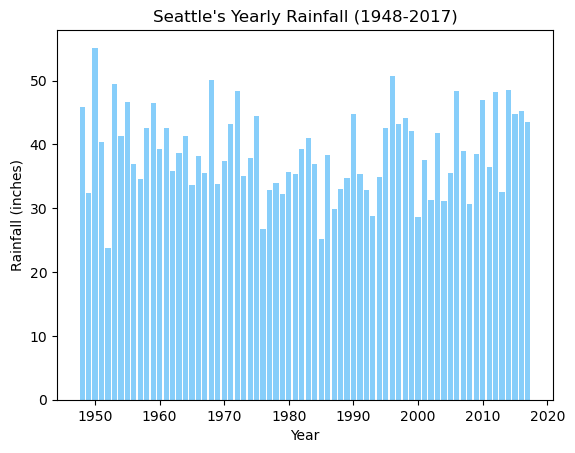

In [28]:
# Create bar plot using viz1 data frame
plt.bar(viz1["date_year"], viz1["yearly_rainfall"], color = "lightskyblue")
plt.title("Seattle's Yearly Rainfall (1948-2017)")
plt.xlabel("Year")
plt.ylabel("Rainfall (inches)")

# Show plot
plt.show()

No year has exceeded the rainfall of 1950. However, there is a drop in rainfall that occurs approximately every 4-6 years.

## Visualization 2: Monthly Rainfall Trend

I wanted to show the montly rainfall trend for Seattle, WA, specifically in the area of Seattle-Tacoma International Airport. I chose this area because the data in the **file_data** table was collected there. The query utilizes the **html_data** table, which contains data from 1991 to 2020.

In [29]:
# This query selects the months of the year from the location 'Seattle Tacoma Intl Ap'
query = """
SELECT jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
FROM html_data
WHERE location = 'Seattle Tacoma Intl Ap'
"""

In [30]:
# Save the returned query data as a data frame
viz2 = pd.read_sql_query(query, conn)

In [31]:
# Preview data frame
viz2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,5.78,3.76,4.17,3.18,1.88,1.45,0.6,0.97,1.61,3.91,6.31,5.72


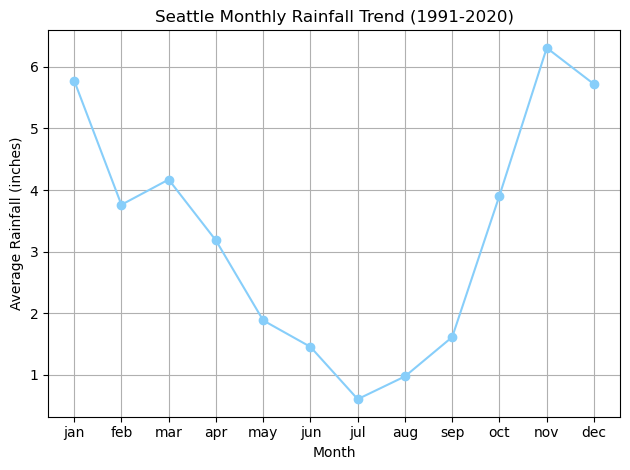

In [32]:
# Simplify x and y contents to input into plt.plot()
x = viz2.columns.tolist()
y = viz2.iloc[0].tolist()

# Create line plot
plt.plot(x, y, marker = "o", color = "lightskyblue")
plt.title("Seattle Monthly Rainfall Trend (1991-2020)")
plt.xlabel("Month")
plt.ylabel("Average Rainfall (inches)")

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

The amount of rainfall decreases during the warmer times of the year and increases during the winter and spring. I live in Southern California, so this plot is not too different from what I'd expect here at home. However, seeing some rainfall in Seattle during the summer months is very interesting.

## Visualization 3: Monthly Temperature Trends

I wanted to create a plot showing the monthly temperature trends to complement the previously created plot. This query will use the temperature data from the **file_data** table, but unfortunately, it only contains data from the years 1991 to 2017.

In [33]:
# This query calculates the average of the min_temp and max_temp columns and uses a GROUP BY to group the calculations by the
# months of the year. The query also uses a filter to ensure only data from 1991 and onwards is used.
query = """
SELECT date_month, ROUND(AVG(min_temp), 2) AS monthly_min, ROUND(AVG(max_temp), 2) AS monthly_max
FROM file_data
WHERE date_year >= 1991
GROUP BY date_month
"""

In [34]:
# Save the returned query data as a data frame
viz3 = pd.read_sql_query(query, conn)

In [35]:
# Preview data frame
viz3

,date_month,monthly_min,monthly_max
0,1,36.85,46.76
1,2,37.39,49.78
2,3,39.54,53.22
3,4,42.63,58.19
4,5,47.89,64.92
5,6,52.44,70.00
6,7,56.27,76.32
7,8,56.57,76.52
8,9,52.84,70.67
9,10,46.50,59.60


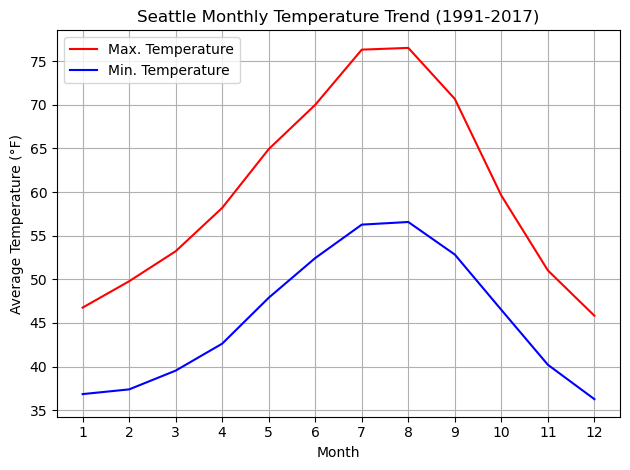

In [36]:
# Create min and max temperature plots
plt.plot(viz3["date_month"], viz3["monthly_max"], label = "Max. Temperature", color = "red")
plt.plot(viz3["date_month"], viz3["monthly_min"], label = "Min. Temperature", color = "blue")
plt.title("Seattle Monthly Temperature Trend (1991-2017)")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°F)")

# Show plot
plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, 13, 1))  # Shows all 12 ticks on the x-axis
plt.tight_layout()
plt.show()

As expected, the temperature rises during the summer months and drops during the winter and spring, resembling a bell curve.

## Visualization 4: Comparing May 27th Across the Years

The **api_data** table contains API data from 5/27/24. I wanted to compare the percentage of days with rain and without rain in the past.

In [38]:
# This is a simple query that selects date, date_year, and rain columns on the date 5/27
query = """
SELECT date, date_year, rain 
FROM file_data
WHERE date_month = 5
AND date_day = 27
"""

In [39]:
# Save the returned query data as a data frame
viz4 = pd.read_sql_query(query, conn)

In [40]:
# Preview data frame
viz4.head(5)

,date,date_year,rain
0,05-27-1948,1948,1
1,05-27-1949,1949,1
2,05-27-1950,1950,1
3,05-27-1951,1951,0
4,05-27-1952,1952,0


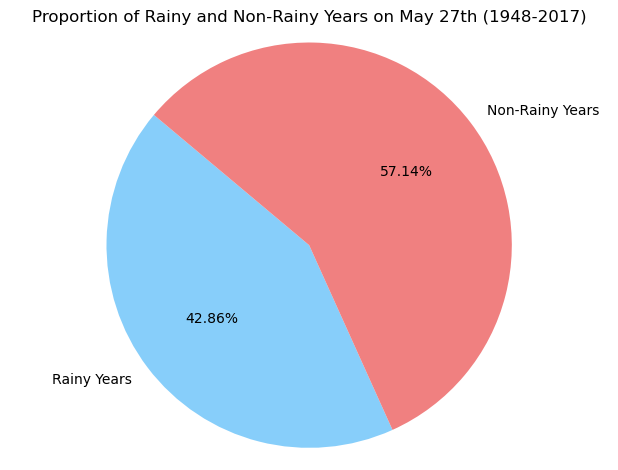

In [41]:
# Calculate the days it rained and days it did not
rain_years = viz4["rain"].sum()
no_rain_years = len(viz4) - rain_years

# Create pie chart labels
labels = ["Rainy Years", "Non-Rainy Years"]
sizes = [rain_years, no_rain_years]
colors = ["lightskyblue", "lightcoral"]

# Create pie chart
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.2f%%", startangle = 140)
plt.title("Proportion of Rainy and Non-Rainy Years on May 27th (1948-2017)")
plt.axis("equal")

# Show plot
plt.tight_layout()
plt.show()

Now let's take a look at the API data from May 27th:

In [55]:
# View current weather data from 5/27/2024
query = """
SELECT current_weather, retrieval_date
FROM api_data
"""

In [56]:
# Execute SQL query and fetch all rows from the executed query
check = cursor.execute(query).fetchall()

In [57]:
# Iterate through the rows and print each returned row, the returned data will be the current weather and date of retrieval
for row in check:
    print(row)

('Clouds', '05-27-2024')


There is no rain value in the API data. Therefore, if someone were to interpret the pie chart and conclude that it is most likely not to rain in Seattle, WA on May 27th, then they would be correct.

## Visualization 5: Comparing Rainy Days and Non-Rainy Days on May 27th

I wanted to further analyze the temperature comparisons and visualize the temperatures on the days it rained and the days it did not rain. This analysis still focuses on May 27th as the date.

In [65]:
# This is a simple query that selects date_year, min_temp, max_temp, and rain columns on the date 5/27
query = """
SELECT date_year, min_temp, max_temp, rain
FROM file_data
WHERE date_month = 5
AND date_day = 27
"""

In [66]:
# Save the returned query data as a data frame
viz5 = pd.read_sql_query(query, conn)

In [67]:
# Preview data frame
viz5.head(5)

,date_year,min_temp,max_temp,rain
0,1948,50,60,1
1,1949,51,61,1
2,1950,47,60,1
3,1951,44,62,0
4,1952,49,80,0


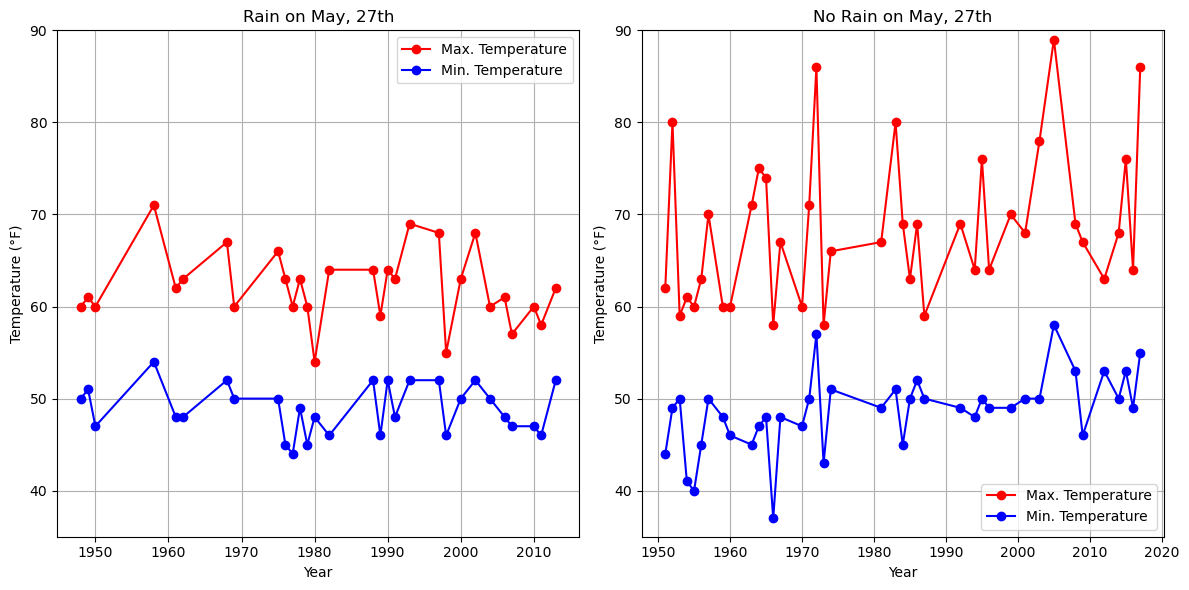

In [74]:
# Simplify x and y contents to input into plt.plot()
rain_date = viz5[viz5["rain"] == 1]["date_year"]
rain_min = viz5[viz5["rain"] == 1]["min_temp"]
rain_max = viz5[viz5["rain"] == 1]["max_temp"]

no_rain_date = viz5[viz5["rain"] == 0]["date_year"]
no_rain_min = viz5[viz5["rain"] == 0]["min_temp"]
no_rain_max = viz5[viz5["rain"] == 0]["max_temp"]

# Create the subplot layout
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Create subplots
# Left plot
plt.subplot(1, 2, 1)
plt.plot(rain_date, rain_max, marker = "o", label = "Max. Temperature", color = "red")
plt.plot(rain_date, rain_min, marker = "o",  label = "Min. Temperature", color = "blue")
plt.title("Rain on May, 27th")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.ylim(35, 90)  # To ensure grids are the same for comparison
plt.legend()
plt.grid(True)

# Right plot
plt.subplot(1, 2, 2)
plt.plot(no_rain_date, no_rain_max, marker = "o",  label = "Max. Temperature", color = "red")
plt.plot(no_rain_date, no_rain_min, marker = "o",  label = "Min. Temperature", color = "blue")
plt.title("No Rain on May, 27th")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.ylim(35, 90)  # To ensure grids are the same for comparison
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

It's interesting to note that, on average, the days with no rain had higher maximum temperatures than the days it did rain. Additionally, there has been an increase in temperatures across the years on days it has not rained. Days with rain also exhibit consistent minimum and maximum temperatures.

## Summary

I learned about the different ways data scientists acquire data, and I was also reminded of how tedious this part of the data science process can be. Although I have never used any web scraping techniques, I have used MySQL before; however, I have never utilized SQL within another programming language. I enjoyed tinkering with SQL within Python, and the fact that data frames are so similar to SQL tables makes things much easier. Since there is no way to create visualizations within SQL, being able to export a SQL query into a data frame for usage in Python is incredibly helpful. Regrettably, I encountered limitations that prevented me from utilizing SQL JOINS or UNIONS to merge the SQL tables. Despite this setback, I successfully generated several insightful plots.

Throughout this project, I performed numerous data transformations across the three datasets I utilized. The ultimate goal for each dataset was to achieve a human-readable format. These transformations included dropping unnecessary columns, modifying column headers, splitting date columns into their components, and eliminating null values. All transformations I applied did not alter the data in any way that may raise ethical concerns. I employed straightforward techniques and did not concatenate any columns, which could have posed ethical concerns. Instead, I simply removed columns that would not have significantly contributed to my analysis. Additionally, I ensured that all data was obtained fairly and solely for educational purposes, explicitly stating this at the beginning of every project milestone.

The [dataset sourced from Kaggle](https://www.kaggle.com/datasets/rtatman/did-it-rain-in-seattle-19482017) utilizes data compiled by NOAA. The [HTML source](https://ggweather.com/normals/ccd_precip.html#W) cites its information as originating from the National Center for Environmental Information. OpenWeather is an online API service that provides weather data through various APIs, including their [Current Weather](https://openweathermap.org/current) and [Geocoding](https://openweathermap.org/api/geocoding-api) APIs. All sources used in my project are reputable and reliable.